## Imports

In [2]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from PySONIC.core import PulsedProtocol
from PySONIC.neurons import getPointNeuron
from PySONIC.utils import logger, si_format
from ExSONIC.core import IintraFiber, IextraFiber, SonicFiber, IntracellularCurrent, PlanarDiskTransducerSource, ExtracellularCurrent, unmyelinatedFiber, myelinatedFiberReilly, unmyelinatedFiberSundt
from ExSONIC.plt import SectionCompTimeSeries, strengthDurationCurve, plotConvergenceResults

logger.setLevel(logging.INFO)
#%matplotlib notebook

## Default parameters

We use identical parameters as in the Sundt 2015 paper (0.8 um diameter, 5 mm long peripheral axon with fast Sodium, delayed-rectifier Potassium and leakage currents).

The following parameters are fixed in the convergence studies. 

In [10]:
# Unmyelinated fiber model parameters
pneuron = getPointNeuron('sundt')          # C-fiber membrane equations
rs = 1e2                                   # axoplasm resistivity, from Sundt 2015 (Ohm.cm)
fiberL = 5e-3                              # axon length (m)

# Stimulation parameters
tstim = 1e-4     # s
toffset = 25e-3  # s
pp = PulsedProtocol(tstim, toffset)

In [34]:
fiberD = 20e-6  # (m)
#fiberL = 5000e-6   
tstim = 1e-4    # s  # duration of the stimulation in Sundt paper
toffset = 20e-3  # s
pp = PulsedProtocol(tstim, toffset)
#fiber = unmyelinatedFiber(IintraFiber, pneuron, fiberD, rs, fiberL)
fiber_class = IextraFiber
fiber = myelinatedFiberReilly(fiber_class, fiberD)
x = fiber.length()/2
zdistance=0.4e-3
psource = ExtracellularCurrent((x, zdistance), mode='anode')
#logger.info(f'Running titration for {si_format(pp.tstim)}s pulse')
logger.setLevel(logging.INFO)
#Ithr = fiber.titrate(psource, pp)  # A
I= 4e-3
#print(f'Excitation threshold: {Ithr*1e9:.2f} nA')
logger.setLevel(logging.INFO)
data, meta = fiber.simulate(psource, I, pp)

 07/01/2020 16:52:40: IextraFiber(FH neuron, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ ExtracellularCurrent(x = (20.0,1.0)mm), I = -1.32 mA, 1.0 ms stim, 20.0 ms offset
 07/01/2020 16:52:40: IextraFiber(FH neuron, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ ExtracellularCurrent(x = (20.0,1.0)mm), I = -2.65 mA, 1.0 ms stim, 20.0 ms offset
 07/01/2020 16:52:40: IextraFiber(FH neuron, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ ExtracellularCurrent(x = (20.0,1.0)mm), I = -5.30 mA, 1.0 ms stim, 20.0 ms offset
 07/01/2020 16:52:40: IextraFiber(FH neuron, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ ExtracellularCurrent(x = (20.0,1.0)mm), I = -10.60 mA, 1.0 ms stim, 20.0 ms offset
 07/01/2020 16:52:40: IextraFiber(FH neuron, 21 nodes, 

Excitation threshold: nan nA


 07/01/2020 16:52:41: IextraFiber(FH neuron, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ ExtracellularCurrent(x = (20.0,1.0)mm), I = 10.00 A, 1.0 ms stim, 20.0 ms offset


 22/01/2020 16:58:18: SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ PlanarDiskTransducerSource(x = (0.0,0.0,0.1)mm), u = 312.82 um/s, 50.0 us stim, 8.0 ms offset, 100.00 kHz PRF, 50.0% DC
 22/01/2020 16:58:18: SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ PlanarDiskTransducerSource(x = (0.0,0.0,0.1)mm), u = 312.82 mm/s, 50.0 us stim, 8.0 ms offset, 100.00 kHz PRF, 50.0% DC
 22/01/2020 16:58:19: SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ PlanarDiskTransducerSource(x = (0.0,0.0,0.1)mm), u = 625.63 um/s, 50.0 us stim, 8.0 ms offset, 100.00 kHz PRF, 50.0% DC
 22/01/2020 16:58:19: SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL 

859625.4080460159


 22/01/2020 16:58:29: SonicFiber(FH neuron, a = 32.0 nm, 21 nodes, rs = 110 Ohm.cm, nodeD = 14.0 um, nodeL = 2.5 um, interD = 14.0 um, interL = 2.0 mm): simulation @ PlanarDiskTransducerSource(x = (0.0,0.0,0.1)mm), u = 268.90 mm/s, 50.0 us stim, 8.0 ms offset, 100.00 kHz PRF, 50.0% DC


cv = 42.59 m/s
dV = 115.44 V


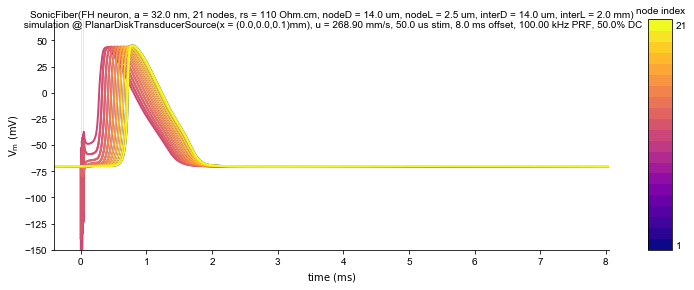

In [20]:
fiberD = 20e-6  # (m)
fiber_class = SonicFiber
fs=1.
Fdrive = 500e3
a=32e-9
fiber = myelinatedFiberReilly(fiber_class, fiberD, a=a, Fdrive=Fdrive, fs=fs)
tstim = 5e-5    # s  # duration of the stimulation in Sundt paper
toffset = 8e-3  # s
pp = PulsedProtocol(tstim, toffset, PRF = 100000., DC=0.5)
zdistance = 1e-4 + 0.00534 / 4.5e6 * (Fdrive - 5e5)      
psource = PlanarDiskTransducerSource(0, 0, zdistance, Fdrive)
Athr = fiber.titrate(psource, pp)  # A
print(Athr)
u= Athr / psource.relNormalAxisAmp(psource.getMinNodeDistance(fiber))
data, meta = fiber.simulate(psource, u, pp)
fig = SectionCompTimeSeries([(data, meta)], 'Vm', fiber.ids).render()
print(f'cv = {fiber.getConductionVelocity(data, out="median"):.2f} m/s')
print(f'dV = {fiber.getSpikeAmp(data, out="median"):.2f} V')